In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.3.0
Eager execution: True


In [ ]:

column_names = ['leftUpperArmX','leftForearmX','leftHandX','rightUpperArmX','rightForearmX','rightHandX','leftUpeerLegX','leftLowerLegX','leftFootX','rightUpperLegX','rightLoweLegX','rightFootX','leftUpperArmY','leftForearmY','leftHandY','rightUpperArmY','rightForearmY','rightHandY','leftUpeerLegY','leftLowerLegY','leftFootY','rightUpperLegY','rightLoweLegY','rightFootY','type']
# column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))


class_names = ['deep squat', 
               'hurdle step', 
               'inline lunge',
               'side lunge', 
               'sit to stand', 
               'standing active straight leg raise',
               'standing shoulder abduction', 
               'standing shoulder extension',
               'standing shoulder internal-external rotation',
               'standing shoulder scaption']

column_defaults = [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]





Features: ['leftUpperArmX', 'leftForearmX', 'leftHandX', 'rightUpperArmX', 'rightForearmX', 'rightHandX', 'leftUpeerLegX', 'leftLowerLegX', 'leftFootX', 'rightUpperLegX', 'rightLoweLegX', 'rightFootX', 'leftUpperArmY', 'leftForearmY', 'leftHandY', 'rightUpperArmY', 'rightForearmY', 'rightHandY', 'leftUpeerLegY', 'leftLowerLegY', 'leftFootY', 'rightUpperLegY', 'rightLoweLegY', 'rightFootY']
Label: type


In [ ]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    "rehab_train.csv",
    batch_size,
    column_names=column_names,
    column_defaults=column_defaults,
    label_name=label_name,
    num_epochs=1)

features, labels = next(iter(train_dataset))
print(features)

OrderedDict([('leftUpperArmX', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([19.707, 21.357, 19.865, 19.762, 21.609, 21.032, 22.238, 20.373,
       20.28 , 21.974, 19.051, 21.053, 24.002, 21.741, 20.384, 21.334,
       22.076, 20.716, 18.95 , 18.893, 21.779, 19.466, 20.845, 20.486,
       22.394, 19.594, 20.462, 20.417, 21.513, 27.888, 19.717, 18.095],
      dtype=float32)>), ('leftForearmX', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([23.807, 25.141, 24.402, 24.619, 25.608, 25.135, 26.334, 24.737,
       25.582, 25.889, 23.776, 25.058, 28.   , 25.662, 24.463, 25.649,
       26.161, 25.914, 23.401, 24.674, 26.21 , 23.548, 25.637, 24.724,
       26.292, 24.829, 24.45 , 25.097, 26.088, 26.239, 23.564, 21.655],
      dtype=float32)>), ('leftHandX', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([28.   , 28.   , 28.   , 28.   , 28.   , 28.   , 28.   , 28.   ,
       28.   , 28.   , 26.566, 28.   , 27.298, 28.   , 28.   , 28.   ,
       28.   , 28.   , 26.435, 28.   

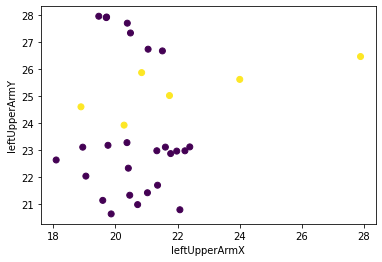

In [ ]:
plt.scatter(features['leftUpperArmX'],
            features['leftUpperArmY'],
            c=labels,
            cmap='viridis')

plt.xlabel("leftUpperArmX")
plt.ylabel("leftUpperArmY")
plt.show()

In [ ]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

train_dataset = train_dataset.map(pack_features_vector)

features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[21.453  25.525  28.     13.442   9.4095  6.6795 19.534  20.849  21.952
  15.821  14.169  12.466  23.337  25.664  28.     23.066  25.263  27.703
  17.005  12.058   7.4824 16.987  11.898   7.5137]
 [20.643  24.971  28.     12.851   7.0705  3.9935 18.778  17.948  19.381
  14.675  15.706  13.901  21.247  23.959  28.     21.106  23.068  26.143
  13.192  19.013  12.818  13.311  18.965  12.131 ]
 [16.479  20.295  21.827   9.8602  6.2184  4.3164 14.891  21.239  28.
  11.926   5.7387  0.     22.493  24.955  28.     22.398  24.775  27.792
  16.222  15.837  12.951  16.213  14.967  11.387 ]
 [20.285  24.53   28.     13.203   9.6216  6.3111 18.146  17.403  16.647
  14.902  15.484  10.5    27.866  26.318  27.875  28.     25.875  27.864
  20.858  14.695   9.0924 21.022  20.162  17.928 ]
 [19.654  23.578  28.     11.985   8.0018  4.0138 17.339  16.616  15.681
  13.781  12.262   8.2626 27.829  25.263  27.482  28.     25.313  27.264
  20.425  14.98    8.8237 20.65   19.167  16.61  ]], shape

Stworzenie modelu....

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=tf.nn.relu, input_shape=(24,)),
  tf.keras.layers.Dense(20, activation=tf.nn.relu),
  tf.keras.layers.Dense(11)
])

In [ ]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 11), dtype=float32, numpy=
array([[-5.7656784,  8.838596 , 16.294134 , -1.0747478,  6.7436385,
        -3.791483 , 13.233332 ,  8.0900955, -4.642752 , -4.162612 ,
        -5.081853 ],
       [-6.3852377,  8.947769 , 17.78092  ,  1.2800019,  7.7724295,
        -3.7274005, 11.637717 ,  9.501751 , -4.4982195, -4.2677455,
        -6.8609257],
       [-6.685441 ,  8.230055 , 19.618008 ,  1.4377451,  7.51805  ,
        -2.414664 , 12.717119 ,  9.181938 , -3.0007708, -3.719673 ,
        -7.8110943],
       [-6.7325845,  8.296691 , 21.947746 , -2.334161 ,  7.3333263,
        -2.8662746, 15.107786 ,  7.950711 , -2.7417085, -2.0448017,
        -8.200854 ],
       [-7.0876584,  7.6084933, 20.949928 , -2.296249 ,  7.390888 ,
        -2.9345925, 14.902322 ,  7.137364 , -2.3494902, -2.2014675,
        -7.1531925]], dtype=float32)>

Aby uzyskać probability, należy użyć f-cji softmax...

In [ ]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 11), dtype=float32, numpy=
array([[2.5077138e-10, 5.5186631e-04, 9.5440519e-01, 2.7322695e-08,
        6.7921217e-05, 1.8057605e-09, 4.4713963e-02, 2.6107428e-04,
        7.7083040e-10, 1.2458945e-09, 4.9688875e-10],
       [3.1889446e-11, 1.4544098e-04, 9.9741399e-01, 6.8017094e-08,
        4.4899680e-05, 4.5491561e-10, 2.1424780e-03, 2.5309177e-04,
        2.1045911e-10, 2.6500954e-10, 1.9817911e-11],
       [3.7679118e-12, 1.1319255e-05, 9.9894804e-01, 1.2704419e-08,
        5.5539017e-06, 2.6969660e-10, 1.0058312e-03, 2.9323481e-05,
        1.5008329e-10, 7.3133596e-11, 1.2224618e-12],
       [3.4980439e-13, 1.1774878e-06, 9.9892849e-01, 2.8446953e-11,
        4.4933734e-07, 1.6708690e-11, 1.0689994e-03, 8.3310346e-07,
        1.8925195e-11, 3.7992970e-11, 8.0568107e-14],
       [6.6436093e-13, 1.6027349e-06, 9.9763811e-01, 8.0036179e-11,
        1.2893082e-06, 4.2272422e-11, 2.3579299e-03, 1.0005812e-06,
        7.5886360e-11, 8.7993300e-11, 6.2221821e-13]], 

In [ ]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1.
 2. 1. 1. 1. 2. 2. 1. 1.]


**TRENOWANIE**

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 8.196399688720703


In [ ]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 8.196399688720703
Step: 1,         Loss: 11.213604927062988


In [ ]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.668, Accuracy: 77.515%
Epoch 050: Loss: 0.161, Accuracy: 96.436%
Epoch 100: Loss: 0.124, Accuracy: 97.497%
Epoch 150: Loss: 0.106, Accuracy: 97.918%
Epoch 200: Loss: 0.098, Accuracy: 98.148%


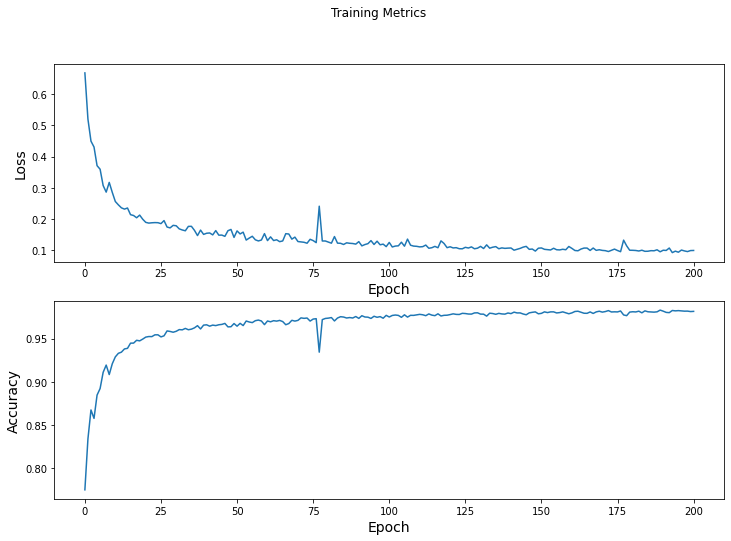

In [ ]:
fig, axes = plt.subplots(2, sharex=False, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)
axes[0].set_xlabel("Epoch", fontsize=14)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [ ]:
model.save("saved_model")

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/content/saved_model')
tflite_model = converter.convert()
open("rehabnet_model.tflite", "wb").write(tflite_model)

In [ ]:
predict_dataset = tf.convert_to_tensor([
[20.401487, 21.026022, 24.356876, 23.836432, 26.646841, 0.7286245, 23.211895, 0.936803, 26.959108, 27.271376, 27.063196, 27.063196, 0.10408922, 0.0, 17.799257, 27.583643, 27.791822, 18.215614, 28.0, 27.271376, 26.959108, 26.855019, 27.791822, 27.791822]
 ])
pred = model.predict(predict_dataset)
predictions = model(predict_dataset, training=False)
print(predictions)

for i, logits in enumerate(predictions):
  print(logits)
  class_idx = tf.argmax(logits).numpy()
  print("class idx")
  print(class_idx)
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))
